# Example to read data in HDF5 format and create a star-formation efficiency plot

In [1]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font',size=20)

In [2]:
# Parameters
outputDir='../../../output/Hen15/'
#outputDir='../../../output/new/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=0
lastFile=9
hubble=0.673
hubble_units=0
xrange=[0.1,10]
yrange=[40,50]
pngfile='figs/Hen15_lxtx.png'

In [7]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
        if iFile == firstFile: print(list(f[snap].attrs.values()))
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
Mvir=np.empty(nGal)
Rvir=np.empty(nGal)
Vvir=np.empty(nGal)
XrayLum=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        Mvir[iGal:iGal+nGalFile]=f[snap]['Mvir']*1e10
        Rvir[iGal:iGal+nGalFile]=f[snap]['Rvir']
        Vvir[iGal:iGal+nGalFile]=f[snap]['Vvir']
        XrayLum[iGal:iGal+nGalFile]=f[snap]['XrayLum']
        iGal+=nGalFile

[b'TABLE', b'3.0', b'58', b'Type', b'HaloIndex', b'SnapNum', b'LookBackTimeToSnap', b'CentralMvir', b'CentralRvir', b'DistanceToCentralGal', b'Pos', b'Vel', b'Len', b'Mvir', b'Rvir', b'Vvir', b'Vmax', b'ColdGasSpin', b'DiskSpin', b'InfallVmax', b'InfallVmaxPeak', b'InfallSnap', b'InfallHotGas', b'HotRadius', b'OriMergTime', b'MergTime', b'flagSplashBack', b'TimeSinceSplashBack', b'ColdGas', b'StellarMass', b'DiskMass', b'BulgeMass', b'HotGas', b'EjectedMass', b'ExcessMass', b'BlackHoleMass', b'ICM', b'MetalsColdGas', b'MetalsStellarMass', b'MetalsDiskMass', b'MetalsBulgeMass', b'MetalsHotGas', b'MetalsEjectedMass', b'MetalsExcessMass', b'MetalsICM', b'PrimordialAccretionRate', b'CoolingRadius', b'CoolingRate', b'CoolingRate_beforeAGN', b'QuasarAccretionRate', b'RadioAccretionRate', b'Sfr', b'SfrBulge', b'XrayLum', b'BulgeSize', b'DiskRadius', b'ColdGasRadius', b'StellarHalfMassRadius', b'StellarHalfLightRadius', b'CosInclination', b'DisruptOn', b'MergeOn', b'MagDust', b'Mag', b'MagBulg

In [8]:
# Check that GM/R=V**2
# (c.G*c.M_sun*u.s**2/(u.Mpc*u.km**2)).si*Mvir/(Rvir*Vvir**2)

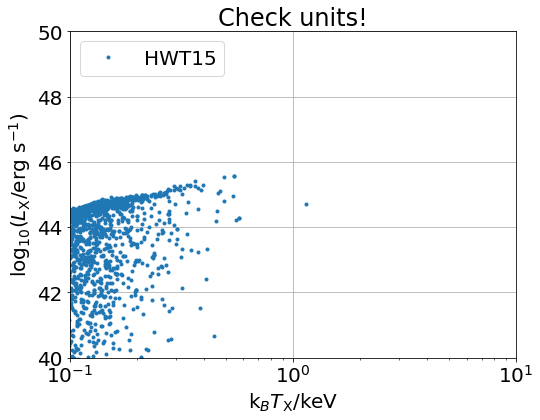

In [9]:
mu=0.6
mumH=mu*c.u
kTfac=(c.G*c.M_sun*mumH/(2.*u.Mpc*u.keV)).si
# in units of keV
kTX=kTfac*Mvir/Rvir

Xlabel=r'k$_BT_\mathrm{X}/$keV'
# Apply appropriate hubble correction factors
if hubble_units==0 or hubble_units==1:
    Ylabel=r'log$_{10}(L_\mathrm{X}/$erg s$^{-1}$)'
elif hubble_units==2:
    XrayLum=XrayLum*hubble**2
#    XrayLum_Dev17=XrayLum_Dev17*hubble**2
    Ylabel=r'log$_{10}(L_\mathrm{X}/h^{-2}$erg s$^{-1}$)'

# Plot
plt.close(1)
plt.figure(1,figsize=(8,6))
#figure(1,figsize=(8,12))
#subplot(2,1,1)
plt.semilogx(kTX,XrayLum,'.',label='HWT15')
plt.grid(True)
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.title('Check units!')
plt.xlim(xrange)
plt.ylim(yrange)
plt.legend(loc=2)
#subplot(2,1,2)
plt.savefig(pngfile)


(array([  1.90000000e+01,   4.33000000e+02,   1.90470000e+04,
          3.67280000e+04,   1.51980000e+04,   4.96900000e+03,
          1.48800000e+03,   3.75000000e+02,   1.24000000e+02,
          1.60000000e+01]),
 array([-2.57777266, -2.24763421, -1.91749575, -1.5873573 , -1.25721884,
        -0.92708039, -0.59694194, -0.26680348,  0.06333497,  0.39347342,
         0.72361188]),
 <a list of 10 Patch objects>)

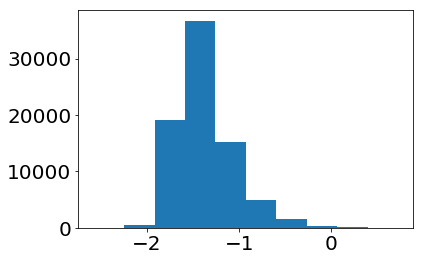

In [12]:
plt.hist(np.log10(kTX))

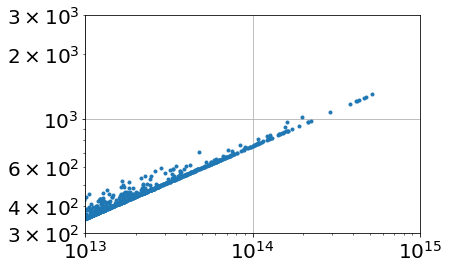

In [40]:
plt.loglog(Mvir,Vvir,'.')
plt.xlim([1e13,1e15])
plt.ylim([300,3000])
plt.grid()